# Silhouette scores 

Necesitamos medir cuantitativamente la calidad de la agrupación, el metodo de puntaje de silueta permite validar que tan bien se ajusta cada punto de los datos a su grupo, este metodo mide que tan similar es un punto respecto 
a su grupo , en comparacion con otros grupos.

La puntuación se silueta se calcula con la formula:

silhouette score = (p – q) / max(p, q)

Donde p es la distancia media de punto con respecto al los puntos del grupo mas cercano que no pertenece, y q es 
la distancia media a los puntos del grupo al cual pertenece.

El rango de puntuación esta entre 1 y -1. Una puntaje cercano a 1 indica que el punto es muy similar a los puntos de su grupo, un puntaje cercano a -1 indica lo contrario.

Si se obtienen muchos puntos con puntaje negativo esto puede indicar que tenemos pocos o muchos grupos en los datos, entonces necesitamos ajustar el numero optimo de grupos


**Implementaremos un rango de numeros de grupos y calcularemos la puntuación obtenida, asi encontraremos el numero de grupos mas adecuado** 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans


Numero de grupos = 2
Puntaje de silueta = 0.47762624870454473

Numero de grupos = 3
Puntaje de silueta = 0.5471742411734871

Numero de grupos = 4
Puntaje de silueta = 0.5794801889687591

Numero de grupos = 5
Puntaje de silueta = 0.5890032635647954

Numero de grupos = 6
Puntaje de silueta = 0.6096904118954452

Numero de grupos = 7
Puntaje de silueta = 0.5627450732575812

Numero de grupos = 8
Puntaje de silueta = 0.4944685357597676

Numero de grupos = 9
Puntaje de silueta = 0.45267778917502677


Text(0.5, 1.0, 'Puntaje de silueta vs numero de grupos')

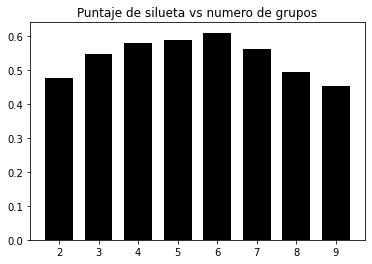

In [5]:
#datos
X = np.loadtxt('data_quality.txt', delimiter=',')

scores = []
values = np.arange(2,10)

#interamos sobre el rango de numero de grupos que vamos a probar para identificar el apropiado
for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    
    #Puntuación de silueta para el modelo actual utilizando la distancia metrica euclidiana
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumero de grupos =", num_clusters)
    print("Puntaje de silueta =", score)
    scores.append(score)
    
#Visualizar las puntuaciones de los diferentes valores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Puntaje de silueta vs numero de grupos')

In [9]:
#Extraemos la mejor puntuación y el optimo numero de grupos
num_clusters = np.argmax(scores) + values[0]
print(np.argmax(scores))

print('\nNumero optimo de grupos =', num_clusters)

4

Numero optimo de grupos = 6


([], <a list of 0 Text major ticklabel objects>)

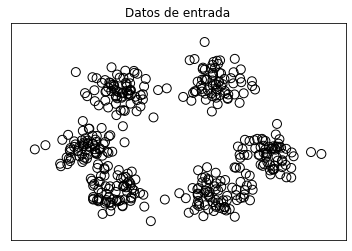

In [10]:
#Visualizar datos
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black',s=80, marker='o', facecolors='none')
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
plt.title('Datos de entrada')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())